# AMATH 515 Homework 4

**Due Date: 03/18/2020**

*Homework Instructions*: Please follow the order of this notebook and fill in the code where commented as `TODO`.

In [1]:
# TODO: Put your name and UW ID here (for homework grading purposes)
UW_ID = "1772371"
FIRST_NAME = "Philip"
LAST_NAME = "Pham"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

## Please complete the code in `solvers.py`

In [3]:
from solvers import *

## Interior Point Method

Consider the problem that minimize a quadratic objective over a box constraint,

$$
\min_x~\frac{1}{2}\|Ax - b\|^2, \quad \text{s.t.}~l \le x \le u
$$

* providing $l$ and $u$, convert the constraint $l \le x \le u$ to the form of $Cx \le d$.
* use the test case to test the code

In [4]:
np.random.seed(123)
m = 20
n = 10
l = np.zeros(n)
u = np.ones(n)
#
A  = np.random.randn(m, n)
xt = -np.random.rand(n)
b  = A.dot(xt)

In [5]:
C = np.concatenate((np.eye(n), -np.eye(n)), axis=0)
d = np.concatenate((u, -l))

In [6]:
x0_ip = 0.5*(l + u)
x_ip, obj_his_ip, err_his_ip, exit_flag_ip = optimizeWithIP(x0_ip, A, b, C, d)

Text(0.5, 0.98, 'Interior Point on Quadratic over Box')

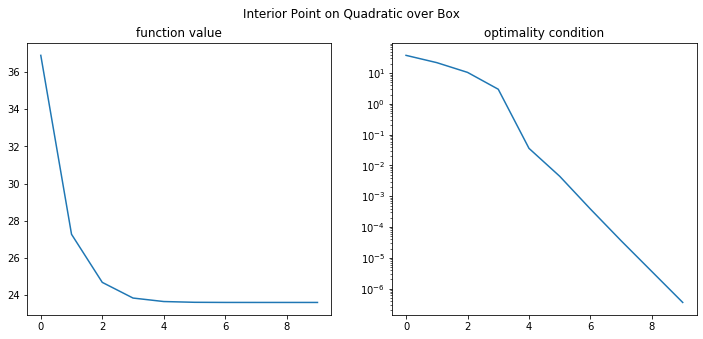

In [7]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_ip)
ax[0].set_title('function value')
ax[1].semilogy(err_his_ip)
ax[1].set_title('optimality condition')
fig.suptitle('Interior Point on Quadratic over Box')
# fig.savefig('interior_point.pdf')

## Chambolle-Pock Algorithm

Consider problem,
$$
\min_x~\|Ax - b\|_1 + \lambda\|x\|_1
$$

* relate this problem to our general template, namely figure out what are $c$, $h$ and $k$.
* solve the problem using Chambolle-Pock Algorithm

In [8]:
np.random.seed(123)
m = 100
n = 200
k = 10
#
A  = np.random.randn(m, n)
xt = np.zeros(n)
xt[np.random.choice(n, k, replace=False)] = np.random.choice([-1.0, 1.0], k)
b  = A.dot(xt)
#
lam = 0.1

In [9]:
c = np.zeros(n)
#
def h(x):
    return np.linalg.norm(x, 1)

def k(x):
    return lam * np.linalg.norm(x, 1)
#
def prox_ch(z, t):
    return np.sign(z) * np.minimum(np.abs(z), t)

def prox_k(z, t):
    return np.sign(z) * np.maximum(np.abs(z) - lam * t, 0)

In [10]:
x0_cp = np.zeros(n)
x_cp, obj_his_cp, err_his_cp, exit_flag_cp = optimizeWithCP(x0_cp, A, b, c, h, k, prox_ch, prox_k)

Text(0.5, 0.98, 'Chambolle-Pock on LAD-Lasso')

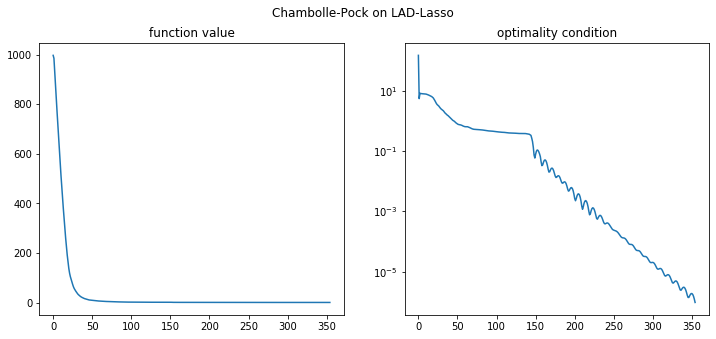

In [11]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_cp)
ax[0].set_title('function value')
ax[1].semilogy(err_his_cp)
ax[1].set_title('optimality condition')
fig.suptitle('Chambolle-Pock on LAD-Lasso')

Text(0.5, 1.0, 'signal recovery')

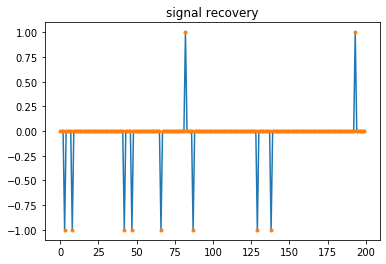

In [12]:
plt.plot(xt)
plt.plot(x_cp, '.')
plt.title('signal recovery')
# plt.savefig('signal_recovery.pdf')